In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import requests
from binance.client import Client
import pandas as pd
import numpy as np
import mplfinance as mpf


In [2]:
class CNN(nn.Module):
    def __init__(self):
        '''
        Init the model by setting up layers'''
        super(CNN,self).__init__()
        
        #initial layer is resnet
        self.resnet = models.resnet18(pretrained =True, progress=False)
        
        #fully connected layers
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 12)
        
        #output layer
        self.fc4 = nn.Linear(12,1)
        
    #Define forward prop
    def forward(self,x):
        '''perform forward pass'''
        
        out =self. resnet(x)
        
        #apply 3 fully connected linear layers with ReLU activation function
        out = self.fc1(x)
        out = F.ReLU(out)
        out = self.fc2(out)
        out = F.ReLU(out)
        out = self.fc3(out)
        out = F.ReLU(out)
        out = self.fc4(out)
        
        return out

In [3]:
class GRUnet(nn.Module):
    def __init__(self, num_featurs, num_rows, batch_size, hidden_size, num_layers):
        '''init model and set up layers'''
        
        super(GRUnet, self).__init__()
        
        #init information about model
        self.num_features = num_features
        self.batch_size = batch_size,
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        #init RNN GRU layer
        self.rnn = nn.GRU(batch_first = True, input_size = self.num_features, hidden_layers = hidden_size, num_layers = self.num_layers)
        
        #init GRU hidden layer
        self.hidden = self.init_hidden(batch_size = self.batch_size, hidden_size = hidden_size)
        
        #dropout layer
        self.dropout = nnDropout(0.3)
        
        #fully connected hidden layer with output of dim 1
        
        self.link_layer = nn.Linear(self.hidden_size, 1000)
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 12)
        
        #output layer
        self.fc4 = nn.Linear(12, 1)
        
    def forward(self, x):
        ''' forward pass'''
        
        #GRU layer
        x, self.hidden = self.rnn(x, self.hidden)
        
        #detatch the hidden layer to prevent further backpropagating. i.e. fix the vanishing gradient problem
        self.hidden = self.hidden.detach().cuda()
        
        #apply drop out
        
        out = self.dropout(x)
        
        #pass through link layer
        out = self.link_layer(out)
        
        out = F.ReLU(out)
        
        out = self.fc2(out)
        out = F.ReLU(out)
        out = self.fc4(out)
        return out 
    def init_hidden(self, batch_size, hidden_size):
        '''init  hidden layer'''
        #creates initial hidden state fore GRU of zeroes
        hidden =torch.ones(self.num_layers, self.num_rows, hidden_size).cuda()
        return hidden

In [4]:
#GRU- CNN
class GRUCNN(nn.Module):
    def __init__(self, num_features, num_rows, batch_size, hidden_size , num_layers):
        '''init the model and set up layers'''
        
        super(GRUCNN, self).__init__()
        
        #Init GRU and CNN the full models
        
        #GRU model params
        
        self.num_features = num_features
        self.num_rows = num_rows
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        #Resnet model
        
        self.cnn = models.resnet18(pretrained = True , progress = Flase)
        
        #RNN-GRU model
        
        self.rnn = nn.GRU(batch_first=True, input_size = self.num_features, hidden_size=self.hidden_size, num_layers = self.num_layers)
        
        
        #init GRU hidden layer
        self.hidden = self.init_hidden(batch_size = self.batch_sze, hidden_size = self.hidden_size)
        self.gru_output = nn.Linear(self.hidden_size, 1000)
        
        #final fully connected layers
        
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 12)
        
        #output layer
        self.fc4 = nn.Linear(12,1)
        
    #define forward prop
    def forward(self, input):
        #input is tuple 
        gru_input, cnn_input = input
        
        #gru
        gru_out, self.hidden = self.rnn(gru_input, self.hidden)
        
        #cnn
        cnn_out = self.cnn(cnn_input)
        
        out = gru_out.add(cnn_out)
        
        #feed through final layers
        #APply 3 fully connected linear layers with relu
        
        out = self.fc1(out)
        out = F.ReLu(out)
        out = self.fc2(out)
        out = F.ReLU(out)
        out = self.fc3(out)
        out = F.ReLu(out)
        
        #output
        out = self.fc4(out)
        
        return out
    
    #init hidden
    def hidden_layer(self, batch_size, hidden_size):
        '''init hidden state'''
        hidden = torch.ones(self.num_layers, self.batch_size, hidden_size).cuda()
        return hidden
    
    def load_cnn_weights(self, cnn):
        cnn_params = cnn.named_parameters()
        gru_cnn_params = dict(self.cnn.named_parameters())
        
        for name, cnn_params in cnn_parms:
            if name in gru_cnn_params:
                gru_cnn_params[name].data.copy_(cnn_param.data)
                
    def load_gru_weights(self,gru):
        gru_params = gru_named_parameters()
        gru_cnn_params = dict(self.rnn.named_parameters())
        
        for name, gru_param in gru_params:
            if name in gru_cnn_params:
                gru_cnn_params[name].data.copy_(gru_param.data)
        

In [5]:
#response = requests.get('https://binance.com')
#Has view and trading capabilities
binance_api = 'fXbp8mouV7RfRTIKvaveAcgvk6WFCIZ0ITNjZfD1EoT7CjD8KpqaopRhrmHO1z78'
binance_secret = 'bZzJykDppwgj4LWMmCQ4aHu0Dgzk2J6bO233r1YpbzSbmHRoc7rkdSeKRugYWXcr'
client = Client(binance_api, binance_secret)

In [6]:
#Get market depth
depth = client.get_order_book(symbol = 'BTCUSDT')

In [7]:
depth

{'lastUpdateId': 4685191439,
 'bids': [['9279.21000000', '0.29538400'],
  ['9279.00000000', '0.50184400'],
  ['9278.91000000', '0.00000600'],
  ['9278.90000000', '0.05388500'],
  ['9278.64000000', '0.13881600'],
  ['9278.63000000', '0.10000000'],
  ['9277.82000000', '0.20000000'],
  ['9277.54000000', '0.20000000'],
  ['9277.42000000', '2.63006400'],
  ['9277.41000000', '0.16000000'],
  ['9277.33000000', '0.16000000'],
  ['9277.32000000', '3.49529800'],
  ['9277.31000000', '3.47206400'],
  ['9277.20000000', '1.13183400'],
  ['9277.19000000', '3.21505600'],
  ['9277.08000000', '0.70019500'],
  ['9277.00000000', '0.53287100'],
  ['9276.73000000', '1.12115600'],
  ['9276.69000000', '0.50000000'],
  ['9276.68000000', '0.46453200'],
  ['9276.59000000', '2.00000000'],
  ['9276.37000000', '0.80854400'],
  ['9276.30000000', '0.60851200'],
  ['9276.16000000', '0.54671400'],
  ['9276.13000000', '0.32969000'],
  ['9276.12000000', '0.21700000'],
  ['9276.02000000', '0.10777200'],
  ['9276.00000000'

In [8]:
#get symbol info
info = client.get_symbol_info('BTCUSDT')
info

{'symbol': 'BTCUSDT',
 'status': 'TRADING',
 'baseAsset': 'BTC',
 'baseAssetPrecision': 8,
 'quoteAsset': 'USDT',
 'quotePrecision': 8,
 'quoteAssetPrecision': 8,
 'baseCommissionPrecision': 8,
 'quoteCommissionPrecision': 8,
 'orderTypes': ['LIMIT',
  'LIMIT_MAKER',
  'MARKET',
  'STOP_LOSS_LIMIT',
  'TAKE_PROFIT_LIMIT'],
 'icebergAllowed': True,
 'ocoAllowed': True,
 'quoteOrderQtyMarketAllowed': True,
 'isSpotTradingAllowed': True,
 'isMarginTradingAllowed': True,
 'filters': [{'filterType': 'PRICE_FILTER',
   'minPrice': '0.01000000',
   'maxPrice': '1000000.00000000',
   'tickSize': '0.01000000'},
  {'filterType': 'PERCENT_PRICE',
   'multiplierUp': '5',
   'multiplierDown': '0.2',
   'avgPriceMins': 5},
  {'filterType': 'LOT_SIZE',
   'minQty': '0.00000100',
   'maxQty': '9000.00000000',
   'stepSize': '0.00000100'},
  {'filterType': 'MIN_NOTIONAL',
   'minNotional': '10.00000000',
   'applyToMarket': True,
   'avgPriceMins': 5},
  {'filterType': 'ICEBERG_PARTS', 'limit': 10},
  

In [9]:
#get candlesticks
candles_btc = client.get_klines(symbol='BTCUSDT', interval = Client.KLINE_INTERVAL_1DAY)


In [10]:
len(candles_btc)

500

In [11]:
candles_btc

[[1549843200000,
  '3679.75000000',
  '3684.90000000',
  '3615.53000000',
  '3631.05000000',
  '24954.61457100',
  1549929599999,
  '90731831.90427426',
  172626,
  '12713.19166600',
  '46221559.64321214',
  '0'],
 [1549929600000,
  '3631.05000000',
  '3667.60000000',
  '3582.34000000',
  '3631.46000000',
  '29479.59823000',
  1550015999999,
  '106766439.99436474',
  198996,
  '14986.11962900',
  '54283275.96877608',
  '0'],
 [1550016000000,
  '3631.51000000',
  '3670.00000000',
  '3591.75000000',
  '3609.40000000',
  '25773.99764800',
  1550102399999,
  '93350740.94830574',
  167690,
  '13552.84642000',
  '49100779.82827613',
  '0'],
 [1550102400000,
  '3608.34000000',
  '3626.40000000',
  '3568.11000000',
  '3590.56000000',
  '21753.50126100',
  1550188799999,
  '78367545.57945933',
  155215,
  '11271.17502000',
  '40602592.45976747',
  '0'],
 [1550188800000,
  '3590.57000000',
  '3653.23000000',
  '3573.45000000',
  '3602.47000000',
  '20777.87289900',
  1550275199999,
  '74938358.1

In [12]:
candles_btc_df = pd.DataFrame(candles_btc)

In [13]:
cols = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteAssetVolume','NumberOfTrades','TakerBuyBaseAssetVol', 'TakerBuyQuoteAseetVol', 'Ignored']
candles_btc_df.columns = cols

In [14]:
candles_btc_df

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseAssetVol,TakerBuyQuoteAseetVol,Ignored
0,1549843200000,3679.75000000,3684.90000000,3615.53000000,3631.05000000,24954.61457100,1549929599999,90731831.90427426,172626,12713.19166600,46221559.64321214,0
1,1549929600000,3631.05000000,3667.60000000,3582.34000000,3631.46000000,29479.59823000,1550015999999,106766439.99436474,198996,14986.11962900,54283275.96877608,0
2,1550016000000,3631.51000000,3670.00000000,3591.75000000,3609.40000000,25773.99764800,1550102399999,93350740.94830574,167690,13552.84642000,49100779.82827613,0
3,1550102400000,3608.34000000,3626.40000000,3568.11000000,3590.56000000,21753.50126100,1550188799999,78367545.57945933,155215,11271.17502000,40602592.45976747,0
4,1550188800000,3590.57000000,3653.23000000,3573.45000000,3602.47000000,20777.87289900,1550275199999,74938358.18352868,151256,10840.39689500,39106496.49706577,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1592611200000,9310.23000000,9395.00000000,9170.95000000,9358.95000000,30329.06538400,1592697599999,282120360.55675261,382778,15125.08176900,140741525.62068328,0
496,1592697600000,9358.95000000,9422.00000000,9281.54000000,9294.69000000,24316.92623400,1592783999999,227467940.61021120,321015,11779.79718200,110215504.55537862,0
497,1592784000000,9294.69000000,9780.00000000,9277.09000000,9685.69000000,57895.46834300,1592870399999,550995799.06947046,588704,30738.20037500,292712778.14347612,0
498,1592870400000,9685.69000000,9720.00000000,9577.03000000,9624.89000000,41031.02938000,1592956799999,395487616.46087799,474319,19112.60621600,184247416.84941235,0


In [15]:
#Plot candlesticks
candles_plot = candles_btc_df.loc[:,"Open": "Volume"]

In [16]:
candles_btc_df['OpenTime'] = pd.to_datetime(candles_btc_df['OpenTime'],utc = True, unit='ms')

In [17]:
candles_plot.index= candles_btc_df['OpenTime']

In [18]:
candles_plot['Open'] = candles_plot['Open'].astype(float)

In [19]:
candles_plot['High'] = candles_plot['High'].astype(float)

In [20]:
candles_plot['Low'] = candles_plot["Low"].astype(float)

In [21]:
candles_plot["Close"] = candles_plot["Close"].astype(float)

In [22]:
candles_plot['Volume'] = candles_plot["Volume"].astype(float)

In [23]:
candles_plot.head()

,Open,High,Low,Close,Volume
OpenTime,,,,,
2019-02-11 00:00:00+00:00,3679.75,3684.90,3615.53,3631.05,24954.614571
2019-02-12 00:00:00+00:00,3631.05,3667.60,3582.34,3631.46,29479.598230
2019-02-13 00:00:00+00:00,3631.51,3670.00,3591.75,3609.40,25773.997648
2019-02-14 00:00:00+00:00,3608.34,3626.40,3568.11,3590.56,21753.501261
2019-02-15 00:00:00+00:00,3590.57,3653.23,3573.45,3602.47,20777.872899


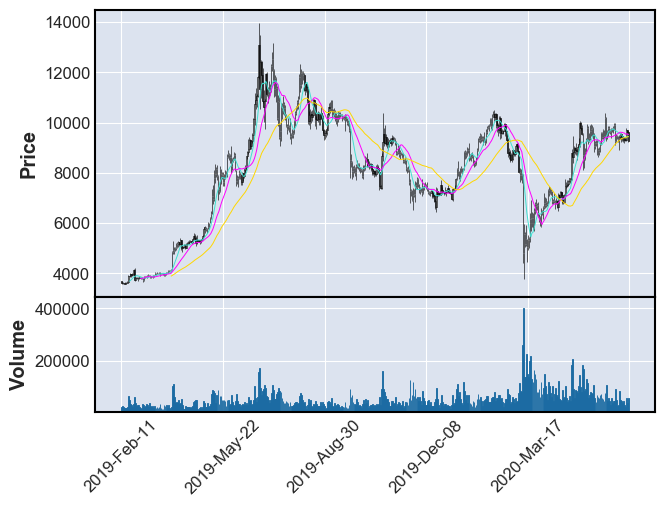

In [24]:
mpf.plot(candles_plot, type ='candle', mav=(9,20, 50), volume=True)

In [25]:
#calculate technical indicators

#simple moving average
def SMA(data, nDays):
    sma = pd.Series(data['Close'].rolling(nDays).mean(), name ='SMA')
    data = data.join(sma)
    return data
    

In [26]:
#Exponential Weighted Moving Average
def EWMA(data, nDays):
    ema = pd.Series(data['Close'].ewm(span = nDays, min_periods = nDays -1).mean(),
                    name = 'EWMA_' + str(nDays))
    data = data.join(ema)
    return data



In [27]:
sma = SMA(candles_btc_df, 20)
sma.dropna()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseAssetVol,TakerBuyQuoteAseetVol,Ignored,SMA
19,2019-03-02 00:00:00+00:00,3822.17000000,3841.31000000,3772.25000000,3819.93000000,19445.83835500,1551571199999,74175357.77882297,149854,10248.94565500,39098061.94664881,0,3789.9765
20,2019-03-03 00:00:00+00:00,3819.97000000,3835.00000000,3781.32000000,3807.75000000,16718.16541000,1551657599999,63791898.99159701,127681,8854.21887800,33793163.48606208,0,3798.8115
21,2019-03-04 00:00:00+00:00,3807.32000000,3830.00000000,3670.69000000,3715.30000000,34742.84166000,1551743999999,129739738.23815794,218615,18023.02240700,67312533.26381876,0,3803.0035
22,2019-03-05 00:00:00+00:00,3716.10000000,3877.10000000,3703.55000000,3857.73000000,32962.53616200,1551830399999,124945530.76214453,202444,17980.12771200,68134618.18206475,0,3815.4200
23,2019-03-06 00:00:00+00:00,3857.58000000,3907.00000000,3813.09000000,3861.84000000,24775.11883000,1551916799999,95417637.58898660,165101,13139.77457300,50622286.06205380,0,3828.9840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020-06-20 00:00:00+00:00,9310.23000000,9395.00000000,9170.95000000,9358.95000000,30329.06538400,1592697599999,282120360.55675261,382778,15125.08176900,140741525.62068328,0,9584.0610
496,2020-06-21 00:00:00+00:00,9358.95000000,9422.00000000,9281.54000000,9294.69000000,24316.92623400,1592783999999,227467940.61021120,321015,11779.79718200,110215504.55537862,0,9538.7570
497,2020-06-22 00:00:00+00:00,9294.69000000,9780.00000000,9277.09000000,9685.69000000,57895.46834300,1592870399999,550995799.06947046,588704,30738.20037500,292712778.14347612,0,9547.1395
498,2020-06-23 00:00:00+00:00,9685.69000000,9720.00000000,9577.03000000,9624.89000000,41031.02938000,1592956799999,395487616.46087799,474319,19112.60621600,184247416.84941235,0,9545.0720


In [28]:
sma = sma[['SMA']].dropna()

In [29]:
sma

,SMA
19,3789.9765
20,3798.8115
21,3803.0035
22,3815.4200
23,3828.9840
...,...
495,9584.0610
496,9538.7570
497,9547.1395
498,9545.0720


In [30]:
ema = EWMA(candles_btc_df, 50)
ema.dropna()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseAssetVol,TakerBuyQuoteAseetVol,Ignored,EWMA_50
48,2019-03-31 00:00:00+00:00,4106.99000000,4116.12000000,4082.57000000,4103.95000000,13525.08743300,1554076799999,55472147.12701675,124046,6824.65737800,27993469.17112726,0,3941.258050
49,2019-04-01 00:00:00+00:00,4102.44000000,4158.70000000,4067.00000000,4144.56000000,25507.06764100,1554163199999,105388238.14788892,184268,12915.28932000,53371959.95327402,0,3950.478147
50,2019-04-02 00:00:00+00:00,4144.54000000,4897.99000000,4140.54000000,4857.29000000,105383.63926300,1554249599999,489018726.75750669,609133,55726.14168400,258300768.81540301,0,3991.352833
51,2019-04-03 00:00:00+00:00,4857.19000000,5275.01000000,4753.50000000,4932.60000000,109890.12574300,1554335999999,548900970.91788429,692019,55975.58476100,279654422.07491424,0,4033.532546
52,2019-04-04 00:00:00+00:00,4932.59000000,5039.08000000,4777.00000000,4898.66000000,61054.25416800,1554422399999,301411332.00902432,419141,31203.30835400,154090564.79115182,0,4072.085362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020-06-20 00:00:00+00:00,9310.23000000,9395.00000000,9170.95000000,9358.95000000,30329.06538400,1592697599999,282120360.55675261,382778,15125.08176900,140741525.62068328,0,9175.748851
496,2020-06-21 00:00:00+00:00,9358.95000000,9422.00000000,9281.54000000,9294.69000000,24316.92623400,1592783999999,227467940.61021120,321015,11779.79718200,110215504.55537862,0,9180.413210
497,2020-06-22 00:00:00+00:00,9294.69000000,9780.00000000,9277.09000000,9685.69000000,57895.46834300,1592870399999,550995799.06947046,588704,30738.20037500,292712778.14347612,0,9200.227986
498,2020-06-23 00:00:00+00:00,9685.69000000,9720.00000000,9577.03000000,9624.89000000,41031.02938000,1592956799999,395487616.46087799,474319,19112.60621600,184247416.84941235,0,9216.881398


In [31]:
ema = ema[["EWMA_50"]].dropna()

In [32]:
#Calculate MACD
def MACD(data):
    emaslow = EWMA(data, 26)
    emafast = EWMA(data, 12)
    result = pd.DataFrame({'MACD': emafast['EWMA_12']-emaslow['EWMA_26'], 'emaSlow': emaslow['EWMA_26'], 'emaFast': emafast['EWMA_12']})
    return result

In [33]:
macd = MACD(candles_btc_df)

In [34]:
macd.dropna()

,MACD,emaSlow,emaFast
24,10.441687,3821.903444,3832.345131
25,11.832494,3825.585447,3837.417941
26,18.317299,3835.530813,3853.848112
27,21.285349,3842.341711,3863.627060
28,20.094551,3844.770397,3864.864948
...,...,...,...
495,18.815332,9432.039419,9450.854751
496,4.964017,9421.865388,9426.829405
497,25.246160,9441.407952,9466.654112
498,35.998880,9454.999215,9490.998095


In [35]:
#append indicators to candles df
candles_btc_df = pd.concat([candles_btc_df, sma], axis=1)

In [36]:
candles_btc_df = pd.concat([candles_btc_df, ema], axis=1)

In [37]:
candles_btc_df = pd.concat([candles_btc_df, macd], axis=1)

In [38]:
#Drop NA values
candles_btc_df = candles_btc_df.dropna()

In [39]:
#DF with indicators
candles_btc_df

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseAssetVol,TakerBuyQuoteAseetVol,Ignored,SMA,EWMA_50,MACD,emaSlow,emaFast
48,2019-03-31 00:00:00+00:00,4106.99000000,4116.12000000,4082.57000000,4103.95000000,13525.08743300,1554076799999,55472147.12701675,124046,6824.65737800,27993469.17112726,0,3990.6785,3941.258050,50.376848,3980.859524,4031.236372
49,2019-04-01 00:00:00+00:00,4102.44000000,4158.70000000,4067.00000000,4144.56000000,25507.06764100,1554163199999,105388238.14788892,184268,12915.28932000,53371959.95327402,0,4003.7700,3950.478147,55.425229,3993.249658,4048.674887
50,2019-04-02 00:00:00+00:00,4144.54000000,4897.99000000,4140.54000000,4857.29000000,105383.63926300,1554249599999,489018726.75750669,609133,55726.14168400,258300768.81540301,0,4053.3345,3991.352833,114.560402,4058.541633,4173.102034
51,2019-04-03 00:00:00+00:00,4857.19000000,5275.01000000,4753.50000000,4932.60000000,109890.12574300,1554335999999,548900970.91788429,692019,55975.58476100,279654422.07491424,0,4106.1085,4033.532546,165.475359,4124.492242,4289.967602
52,2019-04-04 00:00:00+00:00,4932.59000000,5039.08000000,4777.00000000,4898.66000000,61054.25416800,1554422399999,301411332.00902432,419141,31203.30835400,154090564.79115182,0,4154.8535,4072.085362,200.800646,4182.825317,4383.625963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020-06-20 00:00:00+00:00,9310.23000000,9395.00000000,9170.95000000,9358.95000000,30329.06538400,1592697599999,282120360.55675261,382778,15125.08176900,140741525.62068328,0,9584.0610,9175.748851,18.815332,9432.039419,9450.854751
496,2020-06-21 00:00:00+00:00,9358.95000000,9422.00000000,9281.54000000,9294.69000000,24316.92623400,1592783999999,227467940.61021120,321015,11779.79718200,110215504.55537862,0,9538.7570,9180.413210,4.964017,9421.865388,9426.829405
497,2020-06-22 00:00:00+00:00,9294.69000000,9780.00000000,9277.09000000,9685.69000000,57895.46834300,1592870399999,550995799.06947046,588704,30738.20037500,292712778.14347612,0,9547.1395,9200.227986,25.246160,9441.407952,9466.654112
498,2020-06-23 00:00:00+00:00,9685.69000000,9720.00000000,9577.03000000,9624.89000000,41031.02938000,1592956799999,395487616.46087799,474319,19112.60621600,184247416.84941235,0,9545.0720,9216.881398,35.998880,9454.999215,9490.998095


In [40]:
#candles_btc_df = candles_btc_df.astype('float64')

In [41]:
#Convert dataframe to numpy matrix or tensort matrix

In [42]:
#Now we want to normalize the data so we have a meanof 0 and a standard dec 1
candles_matrix = candles_btc_df.to_numpy()

In [43]:
candles_matrix.shape

(452, 17)

In [47]:
candles_matrix = transforms.Normalize(candles_matrix, 0, 1)

In [52]:
#Data set for CNN input

class ChartImageDataset(candles_matrix):
	"""Dataset with input of OCHLV+tech_inds DataFrames, output of ChartImage numpy arrays"""

	def __init__(self, inputs, labels):
		self.inputs, self.labels = [], labels

		for item in inputs:
			self.inputs.append( ChartImageDataset.format(item) )

		self.c = 1 # one label

	def __len__(self):
		return len(self.inputs)
		
	def __getitem__(self, i):
		return self.inputs[i], self.labels[i]

	@staticmethod
	def df_to_chart_arr(df):
		return chart_to_arr(df)

	@staticmethod
	def format(df):
		"""Combine all processing steps from dataframe input to output for training"""
		x = ChartImageDataset.df_to_chart_arr(df)
		return x

NameError: name 'Dataset' is not defined

In [55]:
#DataSet for RNN input
class DFDataset(candles_matrix):
	"""Dataset with inputs of DataFrame of OCHLV+tech_inds, outputs of normalized np arrays"""

	def __init__(self, inputs, labels):
		self.inputs, self.labels = [], labels

		for item in inputs:
			self.inputs.append( DFDataset.format(item) )

		self.c = 1 # one label
	
	def __len__(self):
		return len(self.inputs)
	
	def __getitem__(self, i):
		return self.inputs[i], self.labels[i]

	@staticmethod
	def df_to_arr(df):
		return np.array(df)

	@staticmethod
	def normalize_df(df, norm_func):
		"""Normalize df with norm_func"""
		# apply norm_func on columns
		df = df.apply(norm_func, axis=0)
		return df

	@staticmethod
	def drop_time_col(df):
		# drop time column
		return df.drop('time', axis=1)
	
	@staticmethod
	def format(df):
		"""Combine all processing steps from dataframe input to output for training"""

		# normalize with minmax
		x = DFDataset.normalize_df(df, minmaxnorm)
		x = DFDataset.drop_time_col(x)
		x = DFDataset.df_to_arr(x)
		return x

In [45]:
candles_std = np.std(candles_matrix[:,1:], dtype = 'float')

TypeError: unsupported operand type(s) for -: 'str' and 'float'